The following are the common features found in a Tesla stock price dataset:

Date: The date on which the stock price data was recorded.

Open: This refers to the price of the stock at the beginning of the trading day.

Close: This refers to the price of the stock at the end of the trading day.

Adj. Close: The adjusted close price accounts for any corporate actions such as stock splits, dividends, etc. that occurred on that day.

High: The highest price of the stock during the trading day.

Low: The lowest price of the stock during the trading day.

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Tesla.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [6]:
df.describe(include = "all")

,Date,Open,High,Low,Close,Volume,Adj Close
count,1692,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
unique,1692,NaN,NaN,NaN,NaN,NaN,NaN
top,6/29/2010,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,NaN,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,NaN,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,NaN,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,NaN,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,NaN,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503


In [7]:
df.shape

(1692, 7)

In [8]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [9]:
duplicatevalues = df.duplicated()
df[duplicatevalues]

,Date,Open,High,Low,Close,Volume,Adj Close


In [10]:
# Checking the duplicate values
df.duplicated().sum()

0

In [11]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [12]:
num_df = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']]

In [13]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
90%,248.330996,251.796002,245.329003,248.426993,9.066630e+06,248.426993
95%,258.030489,261.657992,253.499497,257.579011,1.198766e+07,257.579011
99%,275.000000,280.071101,268.680901,273.613509,2.246807e+07,273.613509


In [14]:
import matplotlib.pyplot as plt

<Axes: >

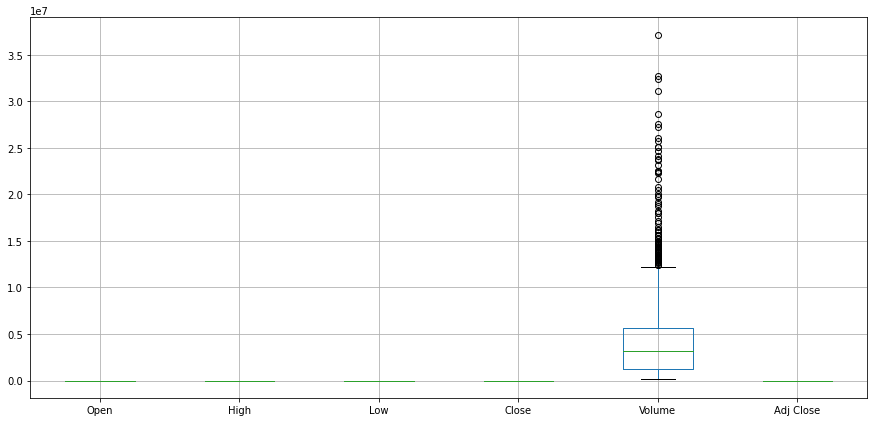

In [15]:
plt.figure(figsize=(15,7))
df[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']].boxplot()

In [16]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [17]:
for feature in df[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']]: 
    lr,ur=remove_outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

<Axes: >

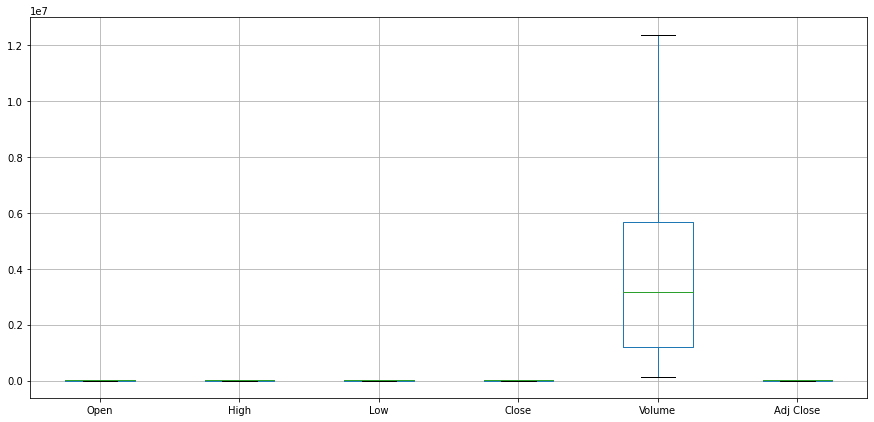

In [18]:
plt.figure(figsize=(15,7))
df[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']].boxplot()

In [19]:
length_data = len(df)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio) 
length_validation = length_data - length_train

In [20]:
train_data = df[:length_train].iloc[:,:2] 
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Open
0,2010-06-29,19.000000
1,2010-06-30,25.790001
2,2010-07-01,25.000000
3,2010-07-02,23.000000
4,2010-07-06,20.000000
...,...,...
1179,2015-03-06,199.210007
1180,2015-03-09,194.389999
1181,2015-03-10,188.460007
1182,2015-03-11,191.149994


In [21]:
validation_data = df[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,Open
1184,2015-03-13,188.949997
1185,2015-03-16,192.000000
1186,2015-03-17,195.429993
1187,2015-03-18,194.960007
1188,2015-03-19,202.000000
...,...,...
1687,2017-03-13,244.820007
1688,2017-03-14,246.110001
1689,2017-03-15,257.000000
1690,2017-03-16,262.399994


In [22]:
dataset_train = train_data.Open.values
dataset_train.shape

(1184,)

In [23]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(1184, 1)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
df_train_scaled = scaler.fit_transform(dataset_train)

df_train_scaled.shape

(1184, 1)

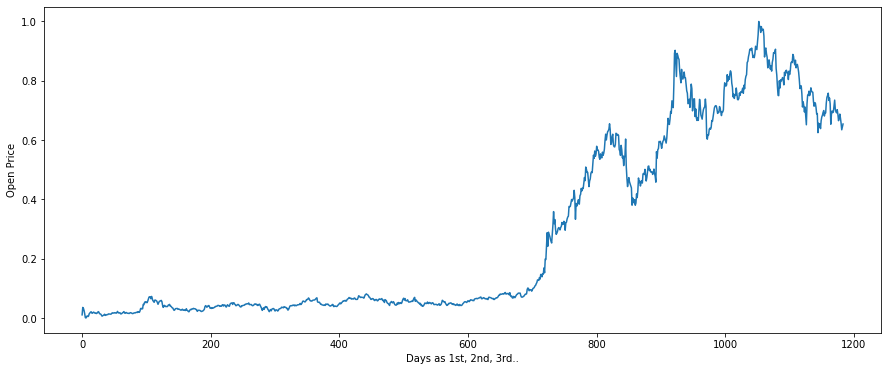

In [25]:
plt.subplots(figsize = (15,6))
plt.plot(df_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [26]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(df_train_scaled[i-time_step:i,0])
    y_train.append(df_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [27]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (1134, 50)
Shape of y_train before reshape : (1134,)


In [28]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (1134, 50, 1)
Shape of y_train after reshape : (1134, 1)


In [30]:
dataset_validation = validation_data.Open.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (508, 1)


In [31]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [32]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [33]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (458, 50)
Shape of y_test before reshape : (458,)


In [34]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [35]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (458, 50, 1)
Shape of y_test after reshape : (458, 1)


In [36]:
X_train[0]

array([[0.01053291],
       [0.03553936],
       [0.03262991],
       [0.02526425],
       [0.01421574],
       [0.00095754],
       [0.        ],
       [0.00530328],
       [0.00666594],
       [0.00460354],
       [0.00662911],
       [0.01399478],
       [0.01679373],
       [0.01926123],
       [0.02102899],
       [0.01664641],
       [0.01605716],
       [0.01859832],
       [0.01973999],
       [0.01756712],
       [0.0162413 ],
       [0.01705153],
       [0.01495231],
       [0.01605716],
       [0.01789858],
       [0.02139727],
       [0.01988731],
       [0.01458403],
       [0.01384746],
       [0.01292675],
       [0.00939123],
       [0.0061135 ],
       [0.00751299],
       [0.00850735],
       [0.01038559],
       [0.01270578],
       [0.00883881],
       [0.00924392],
       [0.01086436],
       [0.01145362],
       [0.01112216],
       [0.01381063],
       [0.01329503],
       [0.0131109 ],
       [0.01296358],
       [0.01281627],
       [0.0155784 ],
       [0.017

In [37]:
y_train[0]

array([0.01789858])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


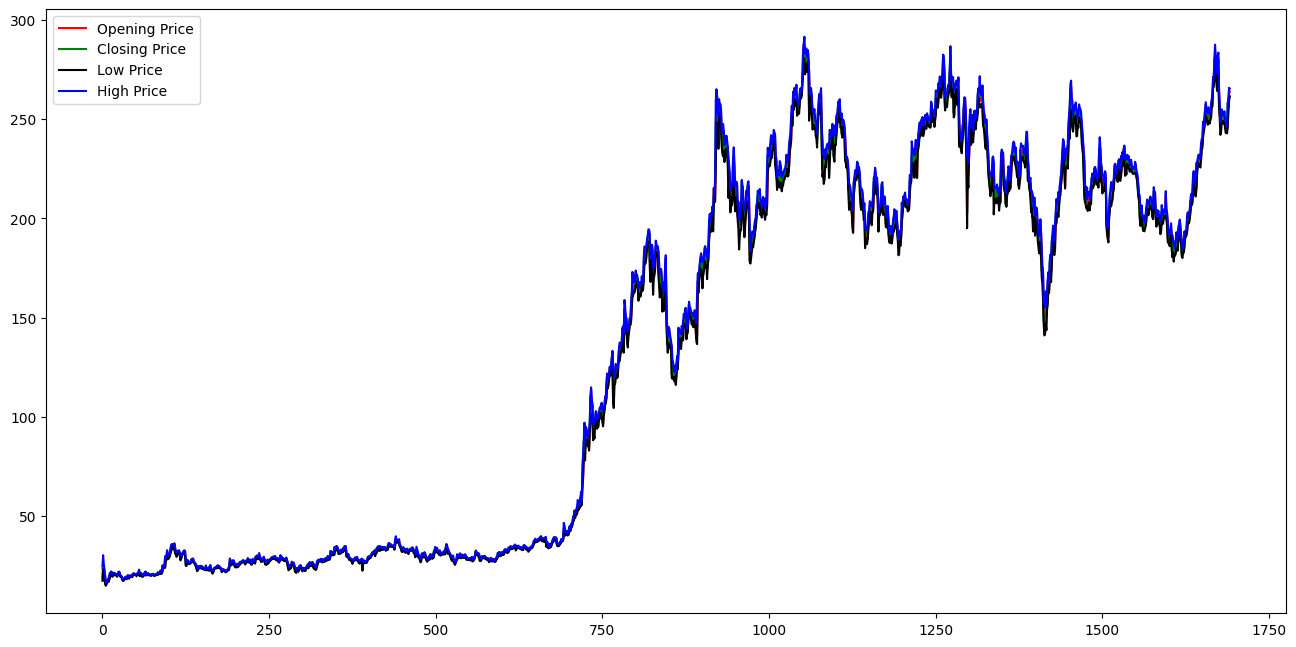

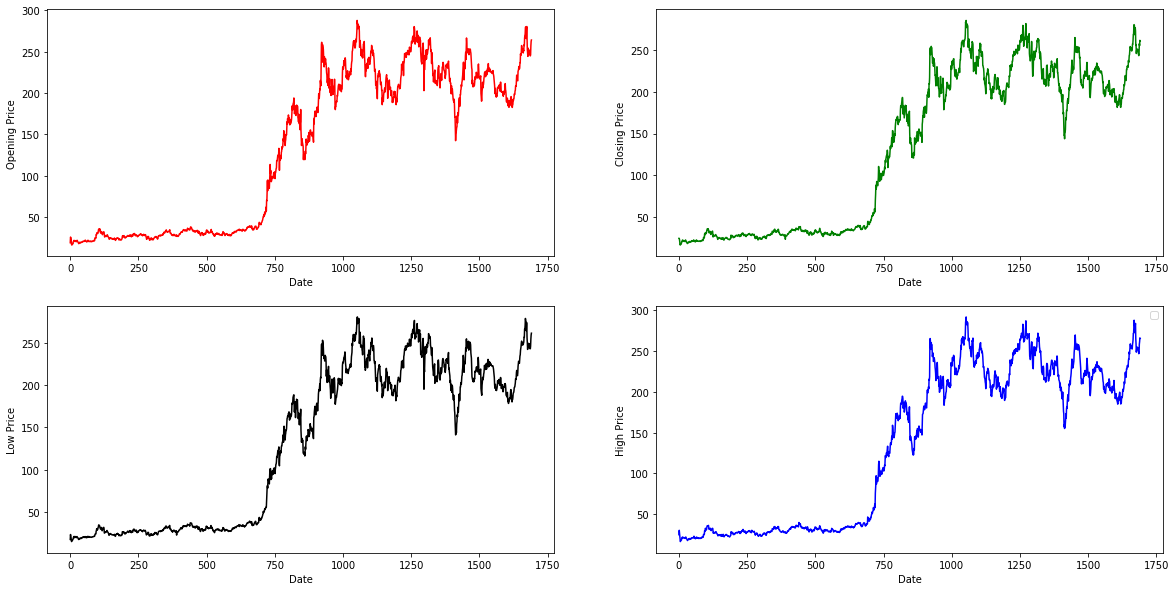

In [38]:
plt.figure(figsize=(16,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(df['Open'], color='red', label = 'Opening Price')
plt.plot(df['Close'], color='green', label = 'Closing Price')
plt.plot(df['Low'], color='black', label = 'Low Price')
plt.plot(df['High'], color='blue', label = 'High Price')
plt.legend(loc='best')

plt.subplots(2, 2, figsize = (20, 10))

ax1 = plt.subplot(2, 2, 1)
plt.plot(df['Open'], color='red')
plt.xlabel('Date')
plt.ylabel('Opening Price')

ax2 = plt.subplot(2, 2, 2)
plt.plot(df['Close'], color='green')
plt.xlabel('Date')
plt.ylabel('Closing Price')

ax3 = plt.subplot(2, 2, 3)
plt.plot(df['Low'], color='black')
plt.xlabel('Date')
plt.ylabel('Low Price')

ax4 = plt.subplot(2, 2, 4)
plt.plot(df['High'], color='blue')
plt.xlabel('Date')
plt.ylabel('High Price')

plt.legend(loc='best')

In [39]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.layers import Dropout
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import itertools

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


In [40]:
y_train = scaler.fit_transform(y_train)

In [41]:
# ------------------LSTM-----------------------
regressor = Sequential()
regressor.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=64, return_sequences=False))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1, activation='linear'))
regressor.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 50, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 49985 (195.25 KB)
Trainable params: 49985 (195.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
#mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# fit model
history = regressor.fit(X_train, y_train, validation_split=0.3, epochs=40, batch_size=64, callbacks=[es])

Epoch 1/40
13/13 [==============================] - 14s 380ms/step - loss: 0.0075 - root_mean_squared_error: 0.0864 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0661
Epoch 2/40
13/13 [==============================] - 3s 211ms/step - loss: 0.0012 - root_mean_squared_error: 0.0343 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0597
Epoch 3/40
13/13 [==============================] - 3s 213ms/step - loss: 8.3877e-04 - root_mean_squared_error: 0.0290 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0805
Epoch 4/40
13/13 [==============================] - 3s 214ms/step - loss: 8.6505e-04 - root_mean_squared_error: 0.0294 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0552
Epoch 5/40
13/13 [==============================] - 3s 215ms/step - loss: 6.6473e-04 - root_mean_squared_error: 0.0258 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0629
Epoch 6/40
13/13 [==============================] - 3s 212ms/step - loss: 7.9752e-04 - root_mean_squared_error: 0.0282 - val_lo

In [43]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

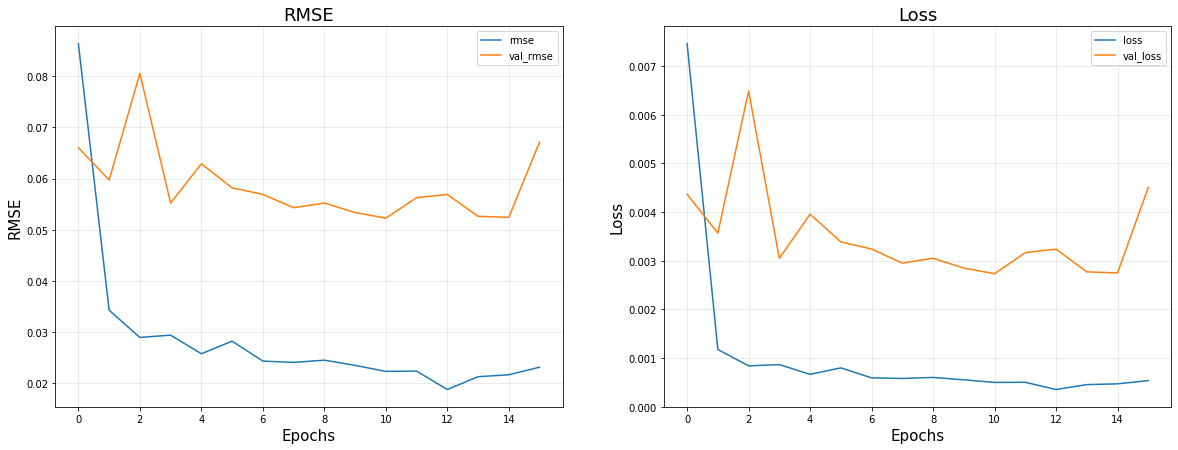

In [44]:
fig = plt.figure(figsize=(20,7))
fig.add_subplot(121)

# Accuracy
plt.plot(history.epoch, history.history['root_mean_squared_error'], label = "rmse")
plt.plot(history.epoch, history.history['val_root_mean_squared_error'], label = "val_rmse")

plt.title("RMSE", fontsize=18)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("RMSE", fontsize=15)
plt.grid(alpha=0.3)
plt.legend()


#Adding Subplot 1 (For Loss)
fig.add_subplot(122)

plt.plot(history.epoch, history.history['loss'], label="loss")
plt.plot(history.epoch, history.history['val_loss'], label="val_loss")

plt.title("Loss", fontsize=18)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

plt.show()


15/15 [==============================] - 3s 40ms/step


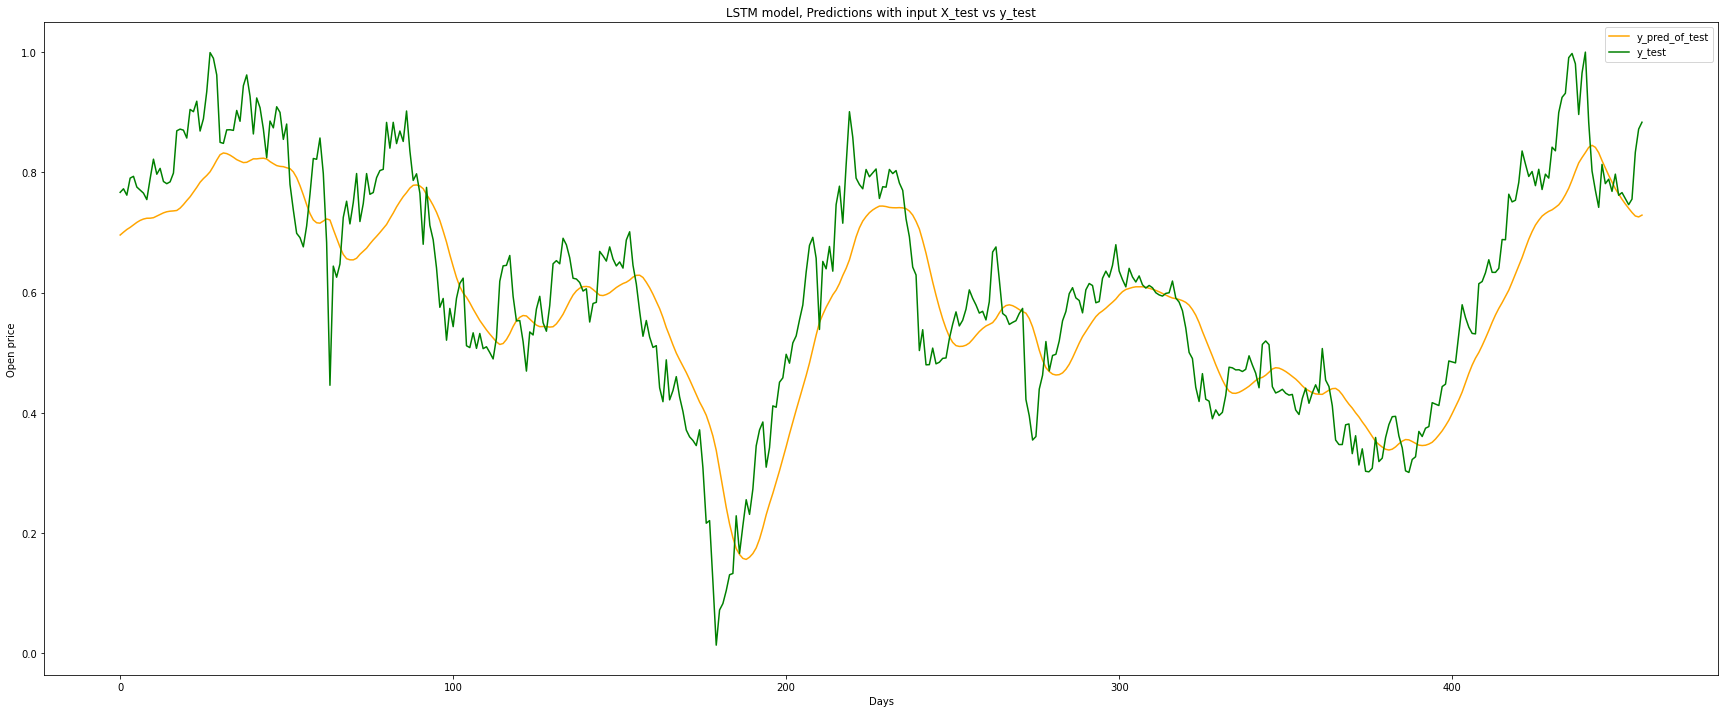

In [45]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(regressor.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [46]:
results = regressor.evaluate(X_test, y_test)
print("test loss, test acc:", np.round(results, 4))

15/15 [==============================] - 1s 42ms/step - loss: 0.0083 - root_mean_squared_error: 0.0913
test loss, test acc: [0.0083 0.0913]


#### Future Prediction

In [47]:
df.iloc[-1]

Date          3/17/2017
Open              264.0
High         265.329987
Low          261.200012
Close             261.5
Volume        6475900.0
Adj Close         261.5
Name: 1691, dtype: object

In [48]:
X_input = df.iloc[-time_step:].Open.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.        ],
        [0.00946363],
        [0.04731867],
        [0.10354429],
        [0.04917441],
        [0.04898868],
        [0.06643166],
        [0.19075893],
        [0.18983106],
        [0.38652815],
        [0.35331247],
        [0.36054942],
        [0.43755803],
        [0.57320468],
        [0.5171645 ],
        [0.46316584],
        [0.48450549],
        [0.42345532],
        [0.49415485],
        [0.40675446],
        [0.47300067],
        [0.45611434],
        [0.58953431],
        [0.57394708],
        [0.7390982 ],
        [0.80478773],
        [0.82241588],
        [0.97624793],
        [0.99424758],
        [0.94971253],
        [0.73074763],
        [0.90981655],
        [1.        ],
        [0.69734648],
        [0.48691791],
        [0.40359993],
        [0.32974585],
        [0.51512331],
        [0.43217682],
        [0.45128979],
        [0.39877539],
        [0.47318612],
        [0.38188907],
        [0.39357964],
        [0.36722971],
        [0

#### creating RNN

In [49]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
36/36 [==============================] - 19s 121ms/step - loss: 0.3735 - accuracy: 8.8183e-04
Epoch 2/50
36/36 [==============================] - 3s 93ms/step - loss: 0.1802 - accuracy: 0.0018
Epoch 3/50
36/36 [==============================] - 4s 115ms/step - loss: 0.1242 - accuracy: 8.8183e-04
Epoch 4/50
36/36 [==============================] - 4s 98ms/step - loss: 0.0970 - accuracy: 0.0018
Epoch 5/50
36/36 [==============================] - 3s 82ms/step - loss: 0.0689 - accuracy: 8.8183e-04
Epoch 6/50
36/36 [==============================] - 4s 103ms/step - loss: 0.0619 - accuracy: 0.0018
Epoch 7/50
36/36 [==============================] - 3s 95ms/step - loss: 0.0506 - accuracy: 0.0018
Epoch 8/50
36/36 [==============================] - 3s 84ms/step - loss: 0.0435 - accuracy: 0.0018
Epoch 9/50
36/36 [==============================] - 3s 84ms/step - loss: 0.0389 - accuracy: 0.0018
Epoch 10/50
36/36 [==============================] - 4s 106ms/step - loss: 0.0331 - accuracy:

#### RNN Model Ealuation

In [50]:
# Losses
history.history["loss"]


[0.3735169470310211,
 0.18015578389167786,
 0.12424857914447784,
 0.09699378162622452,
 0.06891344487667084,
 0.06192469224333763,
 0.05058688297867775,
 0.043499287217855453,
 0.038852509111166,
 0.03308819234371185,
 0.03040585108101368,
 0.02661783993244171,
 0.02267223410308361,
 0.019416728988289833,
 0.021379264071583748,
 0.01754147745668888,
 0.017015207558870316,
 0.01714782975614071,
 0.01511046476662159,
 0.013944676145911217,
 0.012905878946185112,
 0.014274686574935913,
 0.011028867214918137,
 0.010266238823533058,
 0.010485760867595673,
 0.010235318914055824,
 0.008608316071331501,
 0.009217953309416771,
 0.008614352904260159,
 0.008759082295000553,
 0.008663269691169262,
 0.008596327155828476,
 0.006681283004581928,
 0.00793536752462387,
 0.006502308417111635,
 0.005972050596028566,
 0.006326916161924601,
 0.00617406889796257,
 0.00602298229932785,
 0.006242744158953428,
 0.005871281959116459,
 0.005138033535331488,
 0.005962673109024763,
 0.004483531694859266,
 0.004635

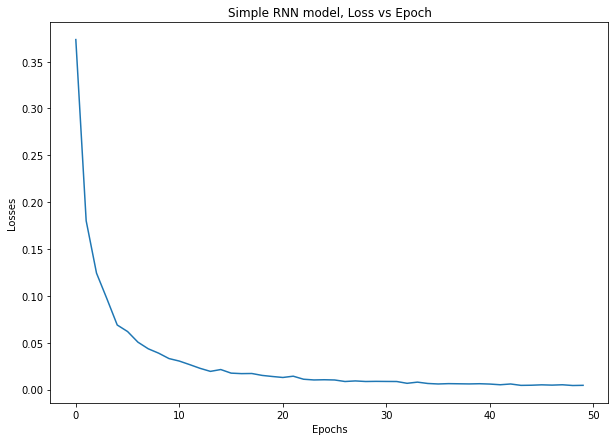

In [51]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

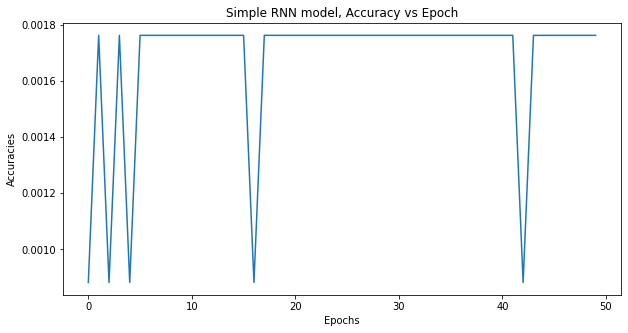

In [52]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

#### RNN Model Prediction

In [53]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

36/36 [==============================] - 4s 36ms/step


(1134, 1)

In [54]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(1134, 1)

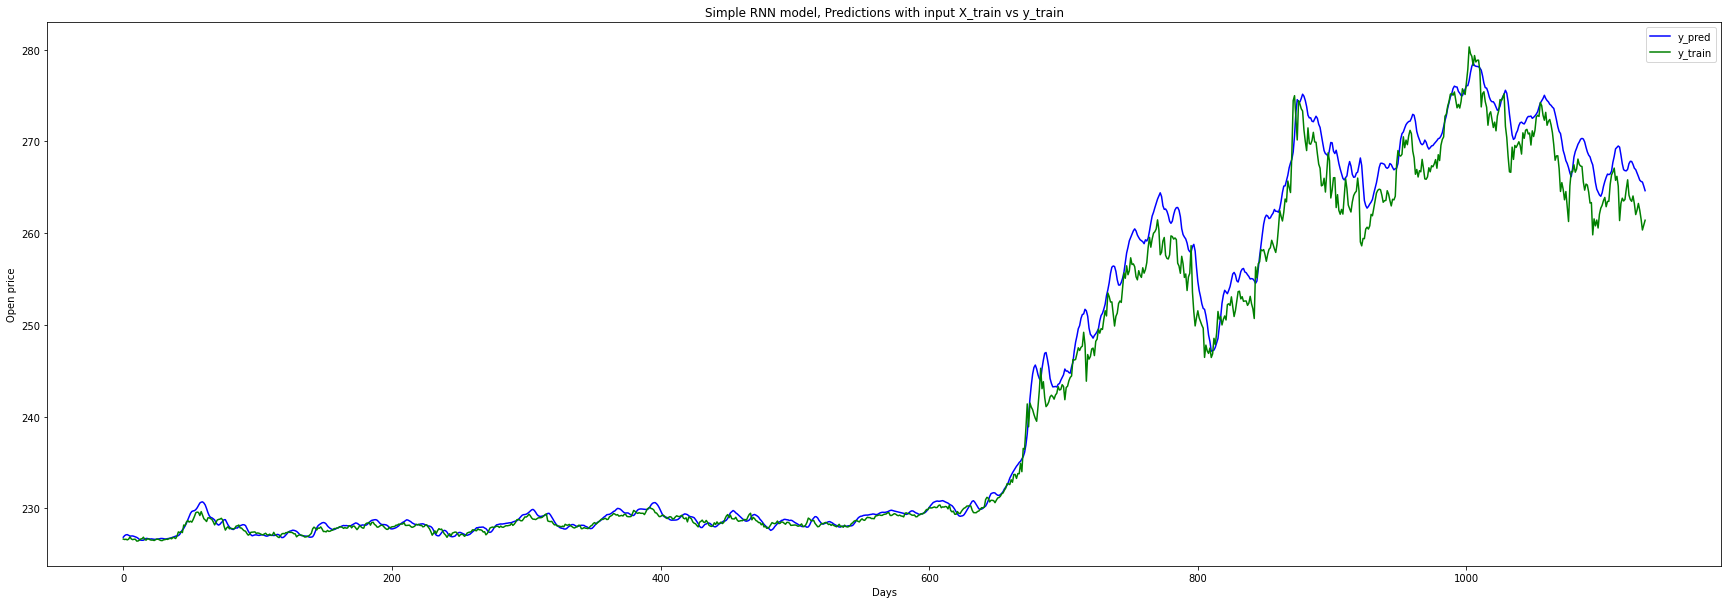

In [55]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()


In [56]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

15/15 [==============================] - 1s 33ms/step
Shape of y_pred_of_test : (458, 1)


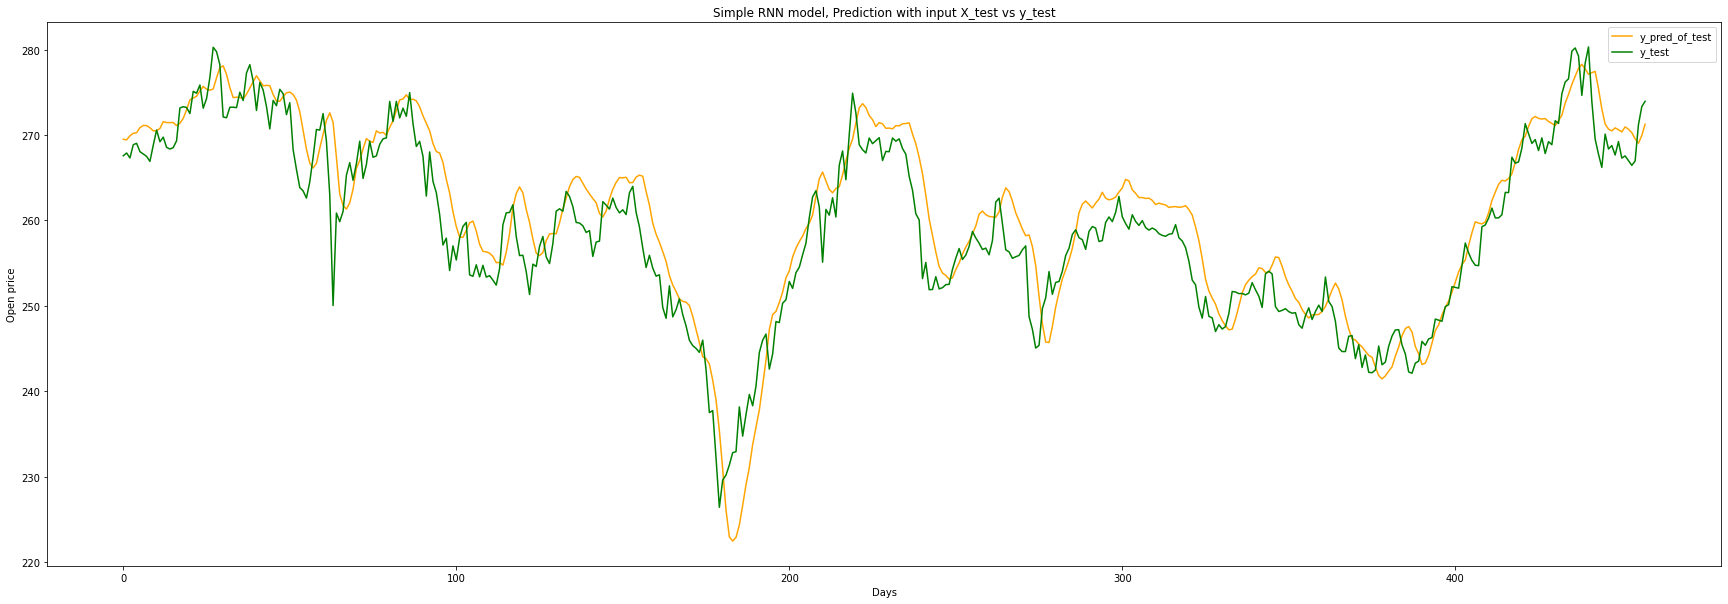

In [57]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

NameError: name 'df_train' is not defined

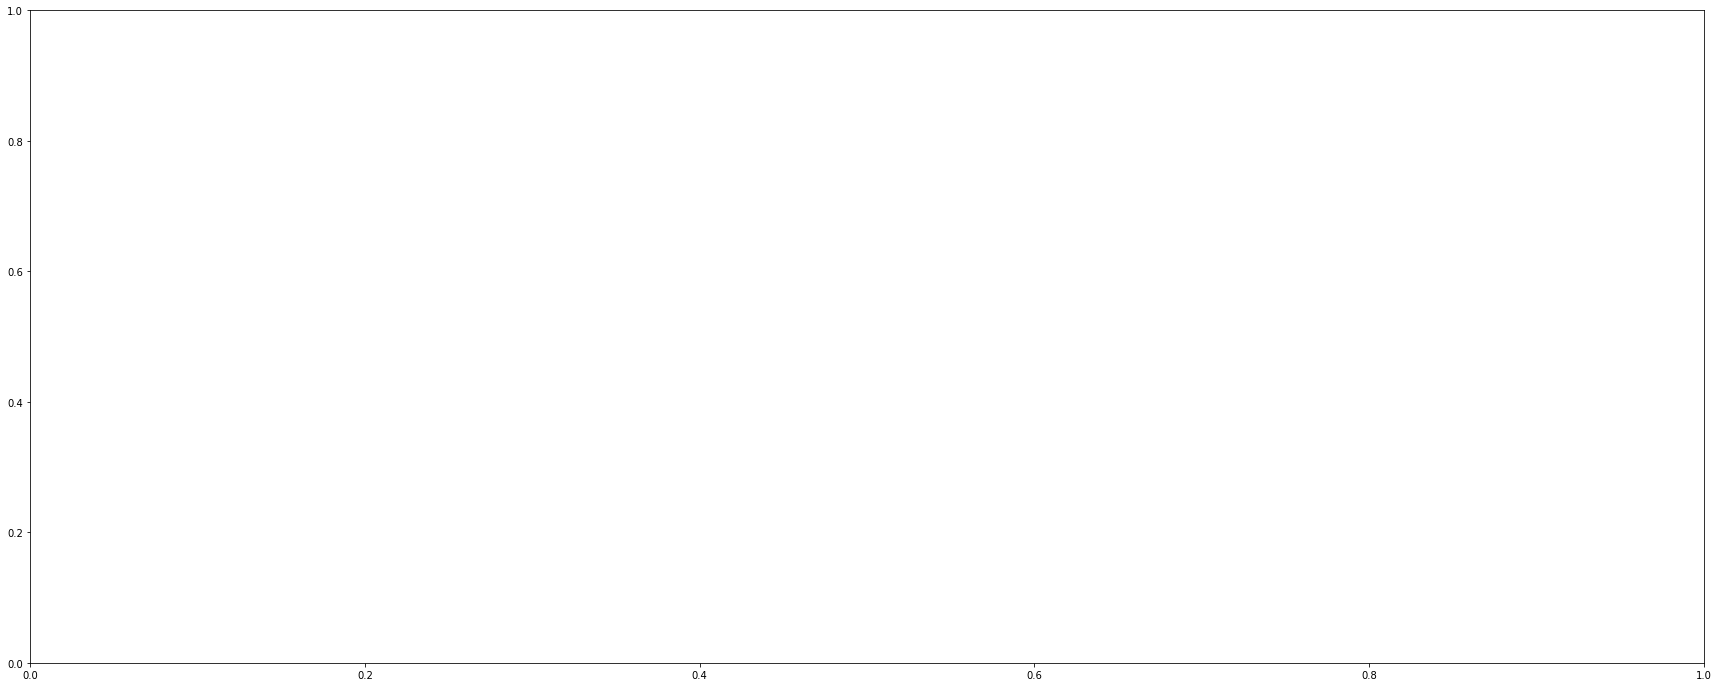

In [58]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(df_train.Date, df_train.Open, label = "train_data", color = "b")
plt.plot(df_test.Date, df_test.Open, label = "validation_data", color = "g")
plt.plot(df_train.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(df_test.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()